# In part A , we will conduct some visulizations, a comparative study and regression predictions of Airbnb 2020 Listings dataset between Seattle and  Washington DC

In [1]:
#Importing Data analysis and Visulization libraries and Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.metrics import  r2_score, mean_squared_error 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor

 Import both Seattle and WashingonDC Dataset and checking the missing values 

In this project, only listing dataset (including all host listing hoe propertises and review scores) is considered 

In [2]:
#all Seattle related data would be named with "_sl", all WasingtonDC related data would be named "_wl"
df_sl =pd.read_csv("E:/Coding/0.Additional Project/AirBnb/Seattle -2020/listings2.csv",encoding='latin1')
df_wl =pd.read_csv("E:/Coding/0.Additional Project/AirBnb/Washington DC -2020/listings2.csv",encoding='latin1')
                                                                                        #encoding= 'latin1' , dataset use latin1 as reference because we will have UnicodeDecodeError: "utf-8" codec can"t decode error
                                                            
num_rows_s =df_sl.shape[0]
num_cols_s= df_sl.shape[1]

num_rows_w =df_wl.shape[0]
num_cols_w= df_wl.shape[1]

most_missing_cols_s = set(df_sl.columns[df_sl.isnull().mean() > 0.75])
most_missing_cols_w = set(df_wl.columns[df_wl.isnull().mean() > 0.75])

print(num_rows_s, num_cols_s, num_rows_w, num_cols_w)
print(most_missing_cols_w, most_missing_cols_w)

7237 89 9342 92
{'monthly_price', 'neighbourhood_group_cleansed', 'weekly_price', 'square_feet', 'license'} {'monthly_price', 'neighbourhood_group_cleansed', 'weekly_price', 'square_feet', 'license'}


C:\Users\HP\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (58,59) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# I/ Data preparation 

STEP 1: Cleaning all Numerical data 

In [3]:
df_sl.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'picture_url', 'host_id', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'weekly_price', 'monthly_p

In [4]:
df_wl.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_fe

In [5]:
# Basic Data Cleaning function for Seattle



def clean_dataset(df):
    '''
    INPUT
    df - pandas dataframe containing data 
    
    OUTPUT
    new_df - cleaned dataset, which contains:
    1. string containing price are converted into numbers;
    2. missing values are imputed with mean or mode or drop
    '''
    
    useless_columns = ['access', 'interaction', 'house_rules','name', 'host_name', 'square_feet', 'id', 'host_id','summary', 'space', 'description', 'neighborhood_overview', 'notes', 
                       'host_since', 'host_location', 'host_about', 'host_neighbourhood', 'host_total_listings_count', 'street', 'neighbourhood', 
                       'minimum_nights', 'maximum_nights', 'city', 'zipcode', 'smart_location', 'latitude', 
                       'longitude', 'is_location_exact', 'weekly_price', 'monthly_price', 'require_guest_profile_picture', 
                       'require_guest_phone_verification', 'calculated_host_listings_count', 'availability_30', 'availability_60', 'availability_90', 
                       'availability_365', 'calendar_updated','transit']
    
    # if all values are unique in this column, like ID, or if the values are url links, then drop it
    for col in df.columns:
        if len(df[col].unique()) == 1:
            df.drop(col, inplace=True, axis=1)
        if ('url' in col):
            df.drop(col, inplace=True, axis=1)
        if col in useless_columns:
            df.drop(col, inplace=True, axis=1)
    
    # generate review columns
    review_columns = []
    for col in df:
        if 'review' in col:
            review_columns.append(col)
    
    
    #convert all related 'price' columns values from string to number
    df['price'] = df['price'].str.replace("[$, ]", "").astype("float")
    df['security_deposit'] = df['security_deposit'].str.replace("[$, ]", "").astype("float")
    df['cleaning_fee'] = df['cleaning_fee'].str.replace("[$, ]", "").astype("float")
    df['extra_people'] = df['extra_people'].str.replace("[$, ]", "").astype("float")
    #convert all percentage columns values to float number
    df['host_response_rate'] = df['host_response_rate'].str.replace("[%, ]", "").astype("float")/100
    df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace("[%, ]", "").astype("float")/100
    #generate new review metric
    df['new_review_metric'] = df['reviews_per_month'] * df['review_scores_rating']/100
    #drop original review columns
    df = df.drop(review_columns, axis=1)
    
    return df

In [6]:
# Apply data cleaning functions above to clean dataset
clen_df_sl = clean_dataset(df_sl)
clen_df_wl = clean_dataset(df_wl)

# 'neighbourhood_group_cleansed' and 'state' are all null in WashingtonDC dataset, so we need to drop these two columns in Seattle dataset manually
clen_df_sl.drop('neighbourhood_group_cleansed', axis=1, inplace = True)
clen_df_sl.drop('state', axis=1, inplace = True)
clen_df_wl.drop('market', axis=1, inplace = True)

#Check the the dataset again after data wrangling numerical columns 

In [7]:
clen_df_sl.columns

Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'market', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'requires_license', 'license',
       'jurisdiction_names', 'instant_bookable', 'cancellation_policy',
       'new_review_metric'],
      dtype='object')

In [8]:
clen_df_wl.columns

Index(['last_scraped', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'state', 'country_code', 'country',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people',
       'calendar_last_scraped', 'requires_license', 'license',
       'jurisdiction_names', 'instant_bookable', 'cancellation_policy',
       'new_review_metric'],
      dtype='object')

STEP 2: Preprocessing he categorical data 

In [9]:
#Prerpcosing the complicated multi-catigorical data which has no formal type (like 'amenities' and 'host_verifications')
#Generate dummy variables for the categorical data and avoid the Dummy Varible Regression to drop one dummy variables 
#Since the real categories of the "amenities" and "host"verifications" may not affect the respondent varible, but the number of the categories may matter, generae the length of each rows 

In [10]:
# Preprocessing the complicated multi-catigories data


#cat_df_sl = clen_df_sl.copy()
#Use the str() to turn the columns with integer values into the string value before we replace them 

def element_len(df, colname):
    coliloc = df.columns.get_loc(colname)
    
    for i, row in enumerate(df[colname]):
        df.iloc[i, coliloc] = str(row).replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').replace(' ','')
        df.iloc[i, coliloc] = len(df.iloc[i, coliloc].split(','))
    return df

#Use the str() to turn the columns with integer values into the string value 

def create_dummy_df(df, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    # Dummy the categorical variables
    cat_cols = ['host_response_time', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable', 'cancellation_policy']

    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [11]:
clen_df_sl = element_len(clen_df_sl, 'amenities')
clen_df_sl = element_len(clen_df_sl, 'host_verifications')

clen_df_wl = element_len(clen_df_wl, 'amenities')
clen_df_wl = element_len(clen_df_wl, 'host_verifications')

 STEP 3: Check the quantitative formation from both datasets and check the adter data wrangling categorical columns 

In [12]:
len(clen_df_sl.columns)

29

In [13]:
len(clen_df_wl.columns)

33

In [14]:
print('Here are the columns that appears in one tabble but not the other: ')
for col in clen_df_wl:
    if col not in clen_df_sl:
        print(col)

Here are the columns that appears in one tabble but not the other: 
last_scraped
state
country_code
country
calendar_last_scraped


# II/ Visulization and Regression Analysis

### 1) What effects do AirBNB homes properties have on prices in both west and east coasts?

1). The relationship between bed or property type on price

Text(0.5, 0.98, 'Property Price in Seattle, according to property type')

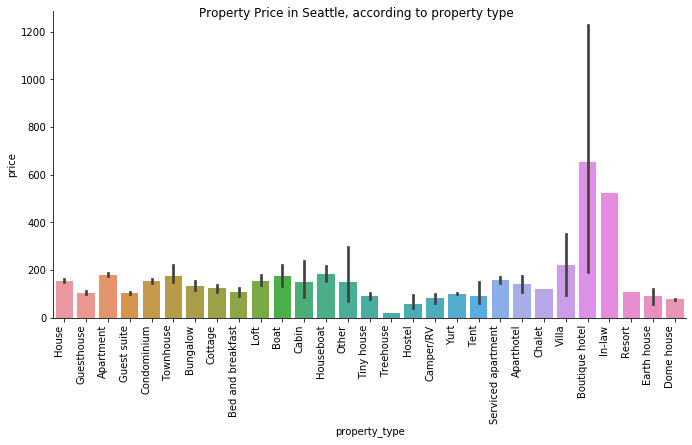

In [15]:
cpsl=sns.catplot(x='property_type', y='price', kind ='bar', data= clen_df_sl, aspect=2)
                                    #aspect: increase the width of your graph 
cpsl.set_xticklabels(rotation=90, horizontalalignment='right')
                                    #rotation: the rotation of the vaues (House, Guesthouse,etc.)
cpsl.fig.suptitle("Property Price in Seattle, according to property type")


Text(0.5, 0.98, 'Property Price in WashingtonDC, according to property type')

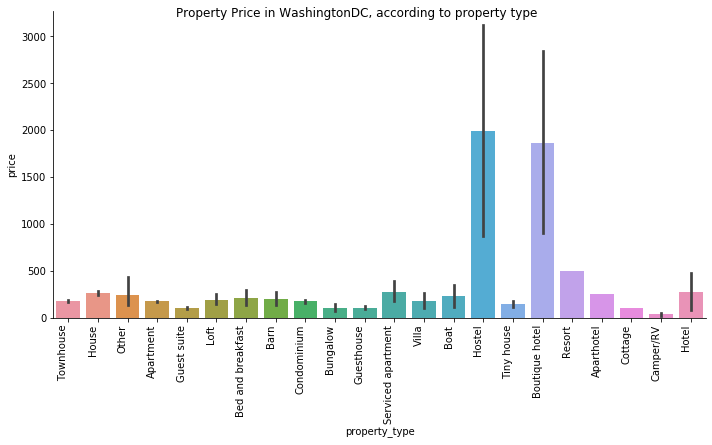

In [16]:
cpwl=sns.catplot(x='property_type', y='price', kind ='bar', data= clen_df_wl, aspect=2)
                                    #aspect: increase the width of your graph 
cpwl.set_xticklabels(rotation=90, horizontalalignment='right')
                                    #rotation: the rotation of the vaues (House, Guesthouse,etc.)
cpwl.fig.suptitle("Property Price in WashingtonDC, according to property type")

Text(0.5, 1.1, 'Property Price in Seattle, according to Room Type & Bed Type')

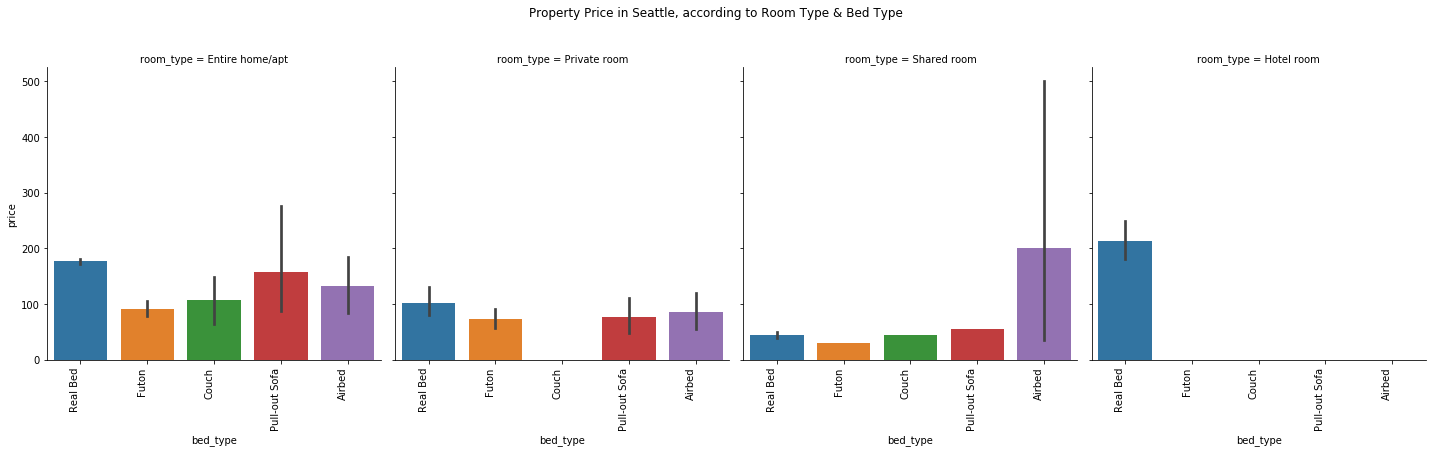

In [17]:
csrpl = sns.catplot(x='bed_type', y='price', col ='room_type', kind= 'bar', data=clen_df_sl)
csrpl.set_xticklabels(rotation=90, horizontalalignment='right')
csrpl.fig.suptitle("\n".join(["Property Price in Seattle, according to Room Type & Bed Type"]), y=1.1)

Text(0.5, 1.1, 'Property Price in WashingtonDC, according to Room Type & Bed Type')

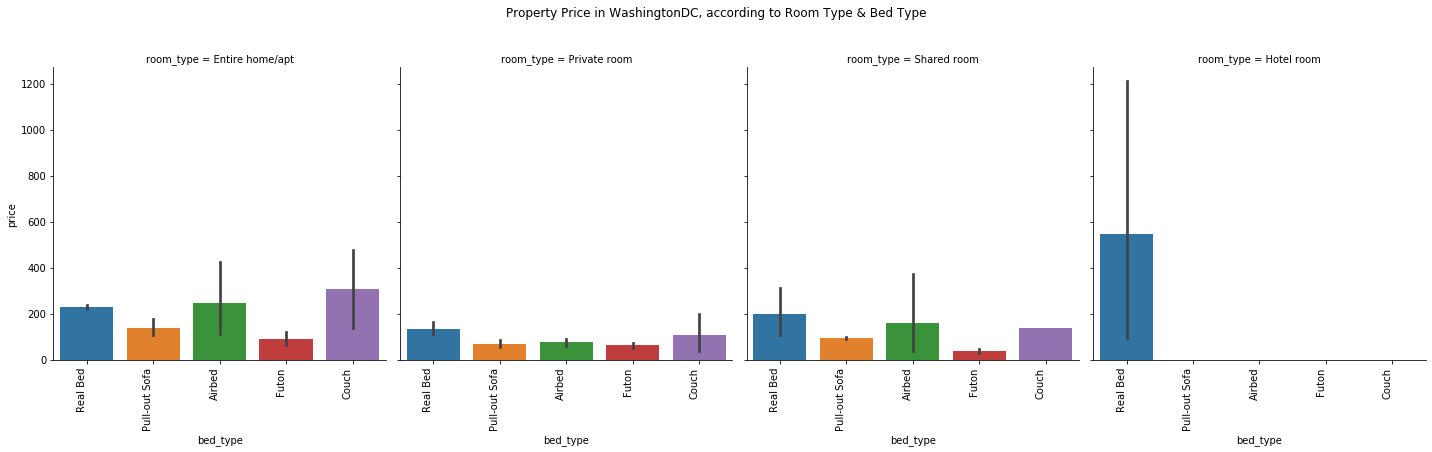

In [18]:
cwrpl = sns.catplot(x='bed_type', y='price', col ='room_type', kind= 'bar', data=clen_df_wl)
cwrpl.set_xticklabels(rotation=90, horizontalalignment='right')
cwrpl.fig.suptitle("\n".join(["Property Price in WashingtonDC, according to Room Type & Bed Type"]), y=1.1)


2). The relationship among the number of beds, bathrooms, bedrooms, accommodates and price

Text(0.5, 1.1, 'Relationship with beds & bathrooms, Seattle')

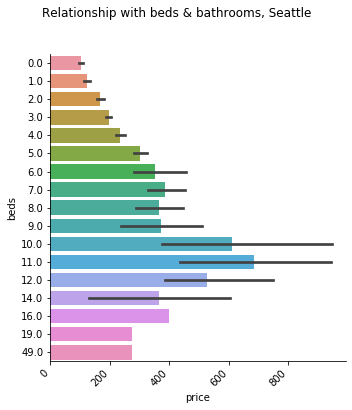

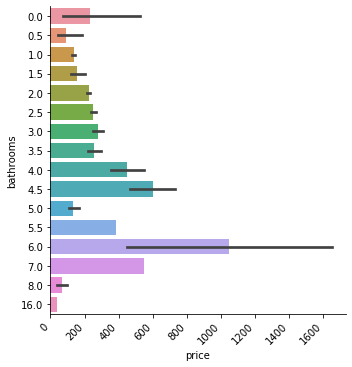

In [19]:
cbsl =sns.catplot (x='price', y='beds', orient ='h', kind ='bar', data= clen_df_sl)
cbsl2 =sns.catplot (x='price', y='bathrooms', orient ='h', kind ='bar', data= clen_df_sl)

cbsl.set_xticklabels(rotation =45, horizontalalignment='right')
cbsl2.set_xticklabels(rotation =45, horizontalalignment='right')

cbsl.fig.suptitle("\n".join(["Relationship with beds & bathrooms, Seattle"]), y=1.1)

Text(0.5, 1.1, 'Relationship with beds & bathrooms, Washington DC')

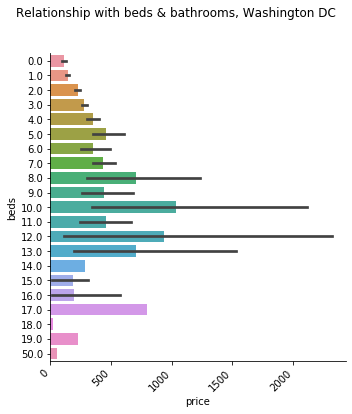

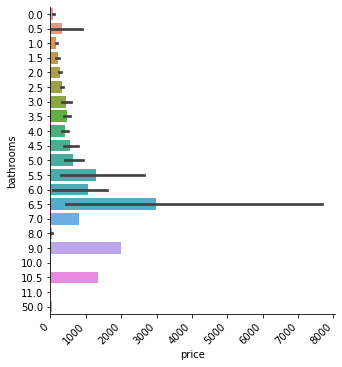

In [20]:
cbwl =sns.catplot (x='price', y='beds', orient ='h', kind ='bar', data= clen_df_wl)
cbwl2 =sns.catplot (x='price', y='bathrooms', orient ='h', kind ='bar', data= clen_df_wl)

cbwl.set_xticklabels(rotation =45, horizontalalignment='right')
cbwl2.set_xticklabels(rotation =45, horizontalalignment='right')

cbwl.fig.suptitle("\n".join(["Relationship with beds & bathrooms, Washington DC"]), y=1.1)

Text(0.5, 1.1, 'Relationship with bedrooms & accomodates, Seattle')

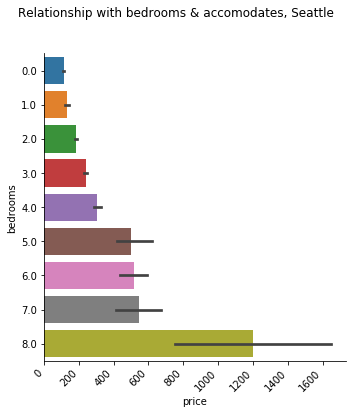

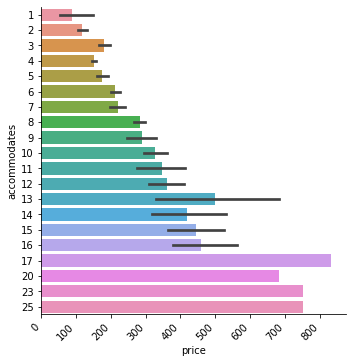

In [21]:
cbsl3 =sns.catplot (x='price', y='bedrooms', orient ='h', kind ='bar', data= clen_df_sl)
cbsl4 =sns.catplot (x='price', y='accommodates', orient ='h', kind ='bar', data= clen_df_sl)

cbsl3.set_xticklabels(rotation =45, horizontalalignment='right')
cbsl4.set_xticklabels(rotation =45, horizontalalignment='right')

cbsl3.fig.suptitle("\n".join(["Relationship with bedrooms & accomodates, Seattle"]), y=1.1)

Text(0.5, 1.1, 'Relationship with bedrooms & accomodates, Washington DC')

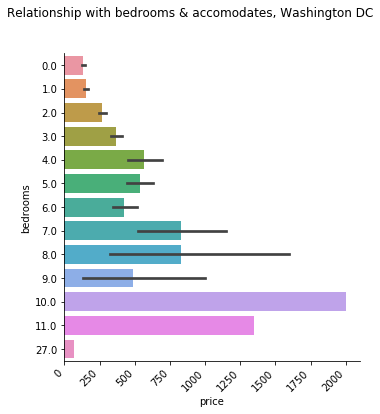

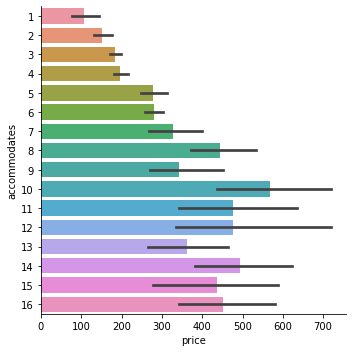

In [22]:
cbwl3 =sns.catplot (x='price', y='bedrooms', orient ='h', kind ='bar', data= clen_df_wl)
cbwl4 =sns.catplot (x='price', y='accommodates', orient ='h', kind ='bar', data= clen_df_wl)

cbwl3.set_xticklabels(rotation =45, horizontalalignment='right')
cbsl4.set_xticklabels(rotation =45, horizontalalignment='right')

cbwl3.fig.suptitle("\n".join(["Relationship with bedrooms & accomodates, Washington DC"]), y=1.1)

### 2) What hosts' behaviors or profiles would influence AirBNB tenants reviews in both west and east coasts?

In [23]:
#Turn categorical columns into dummy variables in order to evaluate them further on 
dummy_s= pd.get_dummies(clen_df_sl, columns=['host_response_time',
                        'host_has_profile_pic', 
                        'host_identity_verified', 
                        'host_is_superhost', 
                        'instant_bookable', 
                        'cancellation_policy'])

dummy_w= pd.get_dummies(clen_df_wl, columns=['host_response_time',
                        'host_has_profile_pic', 
                        'host_identity_verified', 
                        'host_is_superhost', 
                        'instant_bookable', 
                        'cancellation_policy'])

In [29]:
#Merge the Dummy variables columns together 
clen_df_sl_merged= pd.concat([clen_df_sl,dummy_s], axis=1)
clen_df_wl_merged= pd.concat([clen_df_wl,dummy_w], axis=1)

In [35]:
 #Just keep only the relevant factors that contributed to the behavior related columns from the groups 
clen_df_sl_merged.drop(clen_df_sl_merged.columns.difference(['host_response_rate', 'host_acceptance_rate',
                        'guests_included', 
                        'extra_people', 
                        'price',
                        'new_review_metric',
                        'host_response_time_a few days or more',
                        'host_response_time_within a day',
                        'host_has_profile_pic_t',
                        'host_identity_verified_t',    
                        'host_is_superhost_t',
                        'instant_bookable_t',
                        'cancellation_policy_flexible',
                        'cancellation_policy_moderate',
                        'cancellation_policy_strict']), 1, inplace=True)


clen_df_wl_merged.drop(clen_df_wl_merged.columns.difference(['host_response_rate', 'host_acceptance_rate',
                        'guests_included', 
                        'extra_people', 
                        'price',
                        'new_review_metric',
                        'host_response_time_a few days or more',
                        'host_response_time_within a day',
                        'host_has_profile_pic_t',
                        'host_identity_verified_t',    
                        'host_is_superhost_t',
                        'instant_bookable_t',
                        'cancellation_policy_flexible',
                        'cancellation_policy_moderate',
                        'cancellation_policy_strict']), 1, inplace=True)

Text(0.5, 1, "Correlation between Seattle's review and behavior features")

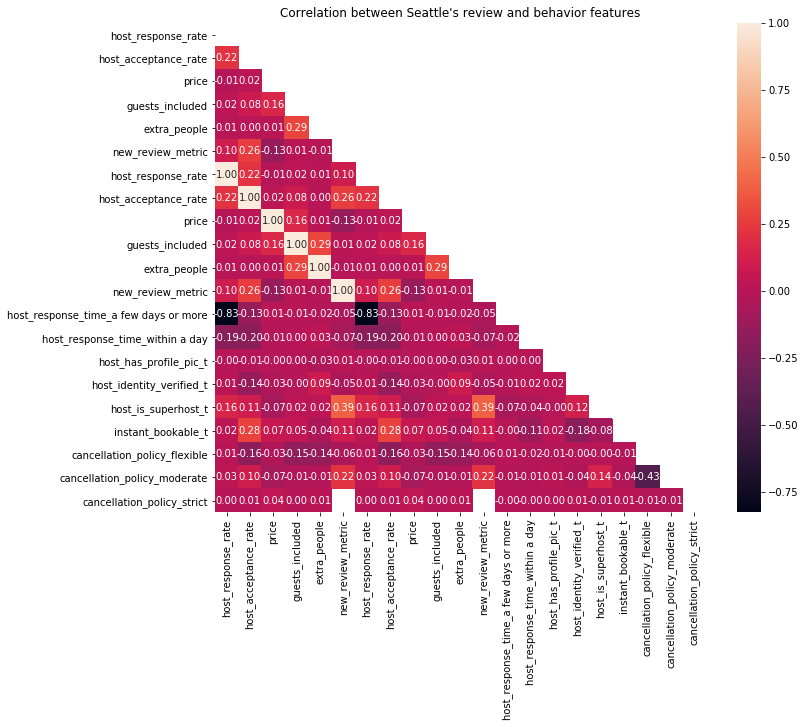

In [41]:
#Correlation between Seattle's review and behavior features

corr = clen_df_sl_merged.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.rcParams['figure.figsize'] = [11, 9]
sns.heatmap(corr, mask=mask, annot = True, fmt='.2f')
plt.title(label= "Correlation between Seattle's review and behavior features", fontdict=None, loc='center', pad=None)

Text(0.5, 1, "Correlation between Washington DC's review and behavior features")

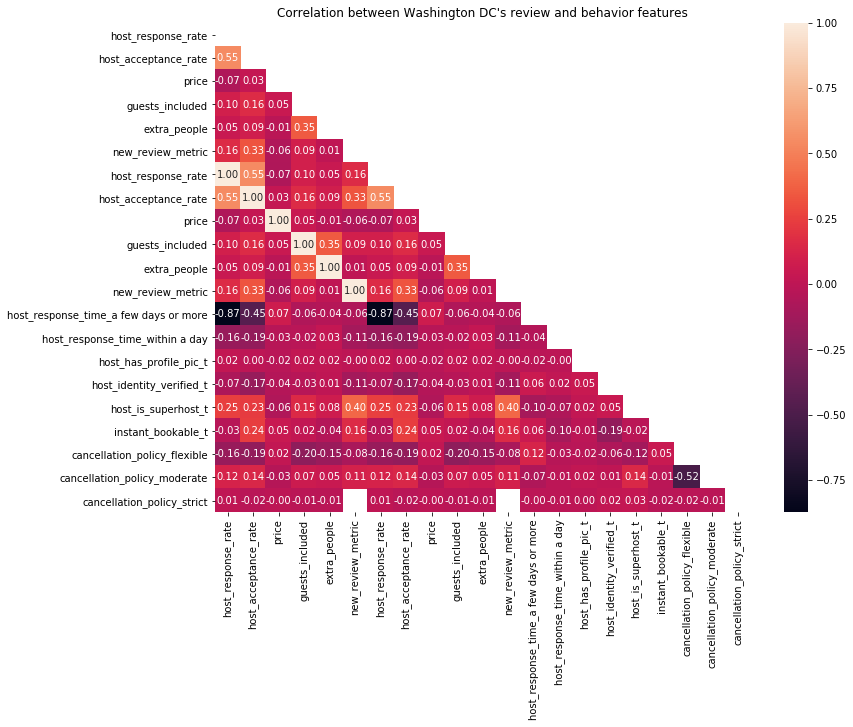

In [40]:
#Correlation between Washington DC's review and behavior features

corr = clen_df_wl_merged.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.rcParams['figure.figsize'] = [12, 9]
sns.heatmap(corr, mask=mask, annot = True, fmt='.2f')
plt.rcParams['figure.figsize'] = [12, 9]
plt.title(label= "Correlation between Washington DC's review and behavior features", fontdict=None, loc='center', pad=None)

### 3) Which AirBNB listing property is the most important one in reviews?- (Regression Analysis)

In [15]:
# copy the cleaned dataset
review_df_sl= clen_df_sl.copy()
review_df_wl= clen_df_wl.copy()

In [16]:
def fin_clean_data(df):    
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    Perform to obtain the correct X and y objects
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the Salary column
    3. Create y as the Salary column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    # drop irrelavent variables
    irrelavent_cols = ['cleaning_fee', 'security_deposit', 'host_verifications']
    
    for col in  irrelavent_cols:
        # for each cat add dummy var, drop original column
        df = df.drop(col, axis=1)
    
    # Drop rows with missing salary values
    df = df.dropna(subset=['new_review_metric'], axis=0)
    y = df['new_review_metric']
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
        


    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
    #    # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    

    
    X = df.drop(['new_review_metric'], axis=1)
    #X = df['host_acceptance_rate'].values

    return X, y

In [17]:
#Use the above function to finalize the data preprocessing for X and y
X_sl, y_sl = fin_clean_data(review_df_sl)
X_wl, y_wl = fin_clean_data(review_df_wl)

In [18]:
#Splitting the training set and test set 
X_train_sl, X_test_sl, y_train_sl, y_test_sl = train_test_split(X_sl, y_sl, test_size =0.25, random_state=42)
X_train_wl, X_test_wl, y_train_wl, y_test_wl = train_test_split(X_wl, y_wl, test_size =0.25, random_state=42)

sc= StandardScaler()
X_train_sl= sc.fit_transform(X_train_sl)
X_test_sl = sc.fit_transform(X_test_sl)
X_train_wl= sc.fit_transform(X_train_wl)
X_test_wl = sc.fit_transform(X_test_wl)

#Random Forest Approach

In [19]:
#Building the regressor and fit the dataset in
#Seattle
regressor_sl = RandomForestRegressor(n_estimators=100, criterion='mse', random_state=42, n_jobs=-1)
                                    #n_estimators is the number of trees, change so that we can get better results 
                                    #No matter how many trees u build, the steps in the visulization will still be the same but the prediction is better   
                                    #random_state is the random number generator
regressor_sl.fit(X_train_sl, y_train_sl.squeeze())


#Washington DC
regressor_wl = RandomForestRegressor(n_estimators=100, criterion='mse', random_state=42, n_jobs=-1)
regressor_wl.fit(X_train_wl, y_train_wl.squeeze())


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [20]:
#Model accuracties and validation analysis
#Seattle
y_train_sl_preds = regressor_sl.predict(X_train_sl)
y_test_sl_preds = regressor_sl.predict(X_test_sl)
print('Seattle s RF Accuracies')
print('Random Forest MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train_sl, y_train_sl_preds), mean_squared_error(y_test_sl, y_test_sl_preds)))
print('Random Forest R^2 train: %.3f, test: %.3f' % (r2_score(y_train_sl, y_train_sl_preds),r2_score(y_test_sl, y_test_sl_preds)))
print('-----------------------------------------------------')

#Washington DC
y_train_wl_preds = regressor_wl.predict(X_train_wl)
y_test_wl_preds = regressor_wl.predict(X_test_wl)
print('Washington DC s RF Accuracies')
print('Random Forest MSE train: %.3f, test: %.3f' % ( mean_squared_error(y_train_wl, y_train_wl_preds), mean_squared_error(y_test_wl, y_test_wl_preds)))
print('Random Forest R^2 train: %.3f, test: %.3f' % ( r2_score(y_train_wl, y_train_wl_preds),r2_score(y_test_wl, y_test_wl_preds)))

Seattle s RF Accuracies
Random Forest MSE train: 0.252, test: 2.233
Random Forest R^2 train: 0.931, test: 0.408
-----------------------------------------------------
Washington DC s RF Accuracies
Random Forest MSE train: 0.242, test: 1.787
Random Forest R^2 train: 0.928, test: 0.448


Text(0.5, 1, "Seattle's feature importances analysis for reviews")

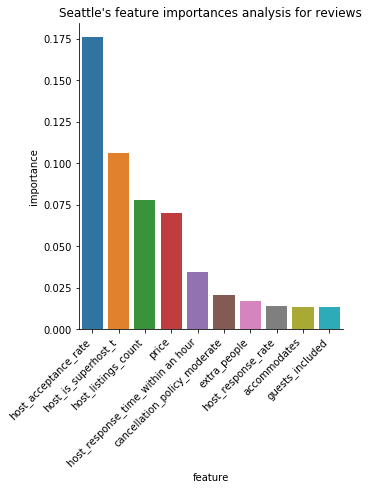

In [21]:
#Feature importancies ranking plot foSeattle's reviews¶
importances = regressor_sl.feature_importances_
feat_names = X_sl.columns
tree_result = pd.DataFrame({'feature': feat_names, 'importance': importances})
tree_result_sort = tree_result.sort_values(by='importance',ascending=False)[:10]
chart = sns.catplot(x='feature', y='importance', kind='bar', data=tree_result_sort)
chart.set_xticklabels(rotation=45, horizontalalignment='right')
plt.title(label= "Seattle's feature importances analysis for reviews", fontdict=None, loc='center', pad=None)


Text(0.5, 1, "Washington DC's feature importances analysis for reviews")

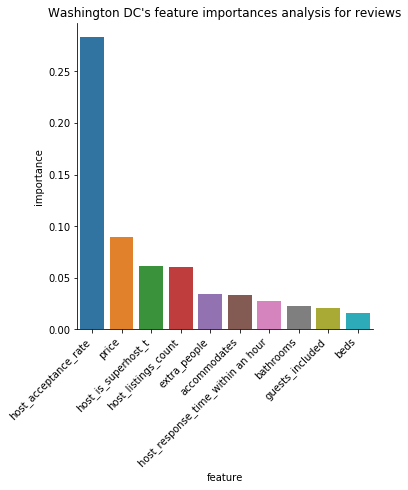

In [22]:
#Feature importancies ranking plot for Washington DC's reviews¶
importances = regressor_wl.feature_importances_
feat_names = X_wl.columns
tree_result = pd.DataFrame({'feature': feat_names, 'importance': importances})
tree_result_sort = tree_result.sort_values(by='importance',ascending=False)[:10]
chart = sns.catplot(x='feature', y='importance', kind='bar', data=tree_result_sort)
chart.set_xticklabels(rotation=45, horizontalalignment='right')
plt.title(label= "Washington DC's feature importances analysis for reviews", fontdict=None, loc='center', pad=None)